<a href="https://colab.research.google.com/github/veronica1908/FINANZAS_E4_AIII/blob/main/c_modelosipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paquetes y librerías

In [2]:
# PAQUETES
%pip install xgboost
!pip install import_ipynb
!pip install openpyxl
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 36.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [96]:
# LIBRERÍAS

import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import plotly.express as px
import ipywidgets as widgets
import import_ipynb
import joblib  ### para guardar modelos
import openpyxl
import pickle

import a_funciones as funciones

from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model, tree

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, mean_squared_error, get_scorer_names, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, DecisionTreeRegressor

from IPython.display import display

from scipy.stats import randint, uniform
from xgboost import XGBRegressor

# Base de datos

In [5]:
#Importamos la base de datos
df_final2 = pd.read_csv('https://media.githubusercontent.com/media/veronica1908/FINANZAS_E4_AIII/main/base_final.txt', sep='\t', header=0, encoding='latin1')
df_final2

,Mes_Pago,Asegurado_Id,Reclamacion,Diagnostico_Codigo,Diagnostico_Desc,Eventos,Valor_Pagado,Poliza_Asegurado_Id,FECHA_INICIO,FECHA_CANCELACION,...,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,CancelaciÃ³n,Edad,Grupo_Edad,Mes pago,AÃ±o pago,Duracion_Cobertura,Costo_Reclamacion
0,2018-03-01,4834968,EXAMENES DE DIAGNOSTICO,Z011,EXAMEN DE OÃÂDOS Y DE LA AUDICIÃÂN,1,495341.335642,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,3,2018,729,495341.335642
1,2018-04-01,4834968,LABORATORIO CLINICO,9,DIAGNÃÂSTICO PENDIENTE,15,717708.276982,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,4,2018,729,47847.218465
2,2018-03-01,4834968,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,1,427837.347642,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,3,2018,729,427837.347642
3,2018-05-01,4834968,EXAMENES DE DIAGNOSTICO,9,DIAGNÃÂSTICO PENDIENTE,1,496955.561442,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,5,2018,729,496955.561442
4,2018-11-01,4834968,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,2,523223.417642,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,11,2018,729,261611.708821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778164,2019-08-01,25333920,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,1,430625.555842,189568131,2019-04-01,2019-12-31,...,0,0,0,0,31,30-39,8,2019,274,430625.555842
3778165,2018-02-01,17044022,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,1,423728.409242,94128351,2018-01-01,2018-01-05,...,0,0,0,1,38,30-39,2,2018,4,423728.409242
3778166,2018-11-01,52163564,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,1,485068.989642,101267369,2018-01-01,2019-12-31,...,0,0,0,1,13,10-19,11,2018,729,485068.989642
3778167,2019-12-01,48242859,CONSULTA DE URGENCIAS,9,DIAGNÃÂSTICO PENDIENTE,1,529464.601576,175057169,2018-10-18,2019-12-31,...,0,0,0,0,17,10-19,12,2019,439,529464.601576


In [7]:
#Observar si existen nulos
df_final2.isnull().sum()

Mes_Pago                0
Asegurado_Id            0
Reclamacion             0
Diagnostico_Codigo      0
Diagnostico_Desc        0
Eventos                 0
Valor_Pagado            0
Poliza_Asegurado_Id     0
FECHA_INICIO            0
FECHA_CANCELACION       0
FECHA_FIN               0
Mujer                   0
FechaNacimiento         0
Ciudad                  0
CANCER                  0
EPOC                    0
DIABETES                0
HIPERTENSION            0
ENF_CARDIOVASCULAR      0
CancelaciÃ³n            0
Edad                    0
Grupo_Edad             82
Mes pago                0
AÃ±o pago               0
Duracion_Cobertura      0
Costo_Reclamacion       0
dtype: int64

In [8]:
#Como son pocos los nulos que estan en la variable "Grupo_Edad", procedemos a eliminarlos

df_final2 = df_final2.dropna(subset=['Grupo_Edad'])

# Opcionalmente, puedes resetear el índice del DataFrame si es necesario
df_final2.reset_index(drop=True, inplace=True)

In [6]:
#Verificamos la existencia de nulos
df_final2.isnull().sum()

Mes_Pago               0
Asegurado_Id           0
Reclamacion            0
Diagnostico_Codigo     0
Diagnostico_Desc       0
Eventos                0
Valor_Pagado           0
Poliza_Asegurado_Id    0
FECHA_INICIO           0
FECHA_CANCELACION      0
FECHA_FIN              0
Mujer                  0
FechaNacimiento        0
Ciudad                 0
CANCER                 0
EPOC                   0
DIABETES               0
HIPERTENSION           0
ENF_CARDIOVASCULAR     0
CancelaciÃ³n           0
Edad                   0
Grupo_Edad             0
Mes pago               0
AÃ±o pago              0
Duracion_Cobertura     0
Costo_Reclamacion      0
dtype: int64

In [9]:
#Para reducir la dimensionalidad, vamos a trabajar solamente con los datos del año más reciente, que correspon de al 2019 (año en el que se realizó el pago)
#y representa el 52% de los registros.
#Eliminamos entonces los datos de 2018
df_final2 = df_final2[df_final2['AÃ±o pago'] != 2018]

In [10]:
#También vamos a reclasificar la edad por grupos etareos de acuerdo con el ministerio de salud en Colombia
# Definir los intervalos y las etiquetas de las categorías
bins = [0, 5, 11, 18, 26, 59, float('inf')]
labels = ['Primera Infancia (0-5 años)', 'Infancia (6-11 años)', 'Adolescencia (12-18 años)',
          'Juventud (14-26 años)', 'Adultez (27-59 años)', 'Persona Mayor (60 años o más)']

# Asignar las categorías a la columna 'edad'
df_final2['Grupo etareo'] = pd.cut(df_final2['Edad'], bins=bins, labels=labels, right=True)

# Mostrar el DataFrame resultante
print(df_final2)

           Mes_Pago  Asegurado_Id                         Reclamacion  \
7        2019-05-01       4834968                    CONSULTA EXTERNA   
8        2019-01-01       4834968                    CONSULTA EXTERNA   
13       2019-03-01       4834968             EXAMENES DE DIAGNOSTICO   
17       2019-05-01       4834968  CIRUGIA AMBULATORIA POR ENFERMEDAD   
18       2019-07-01       4834968                    CONSULTA EXTERNA   
...             ...           ...                                 ...   
3778074  2019-07-01      11903386               CONSULTA DE URGENCIAS   
3778081  2019-07-01      11470806               CONSULTA DE URGENCIAS   
3778082  2019-08-01      25333920                    CONSULTA EXTERNA   
3778085  2019-12-01      48242859               CONSULTA DE URGENCIAS   
3778086  2019-12-01      30824331               CONSULTA DE URGENCIAS   

        Diagnostico_Codigo  \
7                        9   
8                        9   
13                       9   
17 

In [11]:
#Y vamos a trabajar solamente con los grupos etareos de Adultéz y Persona mayor
# Eliminar las filas que corresponden a las categorías que no se utilizarán
df_final2 = df_final2[~df_final2['Grupo etareo'].isin(['Primera Infancia (0-5 años)',
                                                         'Infancia (6-11 años)',
                                                         'Adolescencia (12-18 años)',
                                                         'Juventud (14-26 años)'])]

In [12]:
#Como la variable RECLAMACIÓN tiene 41 valores diferentes, vamos a revisarlos para realizar una reclasificación y disminuir las categorías.
categorias_reclamacion = df_final2['Reclamacion'].unique()

# Imprimir las categorías únicas
print("Categorías en la columna 'Reclamación':")
for categoria in categorias_reclamacion:
    print(f'    {categoria}')

Categorías en la columna 'Reclamación':
    CONSULTA EXTERNA
    EXAMENES DE DIAGNOSTICO
    CIRUGIA AMBULATORIA POR ENFERMEDAD
    LABORATORIO CLINICO
    TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES
    CONSULTAS PRENATALES
    ATENCION DEL PARTO
    CONSULTA DE URGENCIAS
    TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD
    TRATAMIENTOS ESPECIFICOS
    FISIOTERAPIA ILIMITADA
    TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD
    PAMD
    INFILTRACIONES
    Sin Informacion
    TRASLADO EN AMBULANCIA
    TRATAMIENTO AMBULATORIO POR CANCER
    CONCILIACION
    CIRUGIA AMBULATORIA POR ACCIDENTE
    TRATAMIENTO MEDICO AMBULATORIO POR ENFERMEDAD EN URGENCIAS
    TRATAMIENTO QUIRURGICO HOSPITALARIO POR CANCER Y COMPLICACIONES
    COBERTURA PROGRAMA PALIATIVOS
    TRATAMIENTOS AMBULATORIOS ESPECIALES
    TRATAMIENTO QUIRURGICO HOSPITALARIO POR ACCIDENTE
    ODONTOLOGÃÂA
    DIALISIS
    ATENCION INTEGRAL DE SALUD MENTAL
    TRATAMIENTO MEDICO HOSPITALARIO POR COMPLICACIONES DEL EMBA

In [13]:
# Con ayuda de inteligencia artificial, buscamos la agrupación de estas reclamaciones en tres categorías

# Diccionario de mapeo
mapping = {
    # Atención Ambulatoria y Consultas
    'CONSULTA EXTERNA': 'Atención Ambulatoria y Consultas',
    'EXAMENES DE DIAGNOSTICO': 'Atención Ambulatoria y Consultas',
    'CIRUGIA AMBULATORIA POR ENFERMEDAD': 'Atención Ambulatoria y Consultas',
    'LABORATORIO CLINICO': 'Atención Ambulatoria y Consultas',
    'TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES': 'Atención Ambulatoria y Consultas',
    'CONSULTAS PRENATALES': 'Atención Ambulatoria y Consultas',
    'CONSULTA DE URGENCIAS': 'Atención Ambulatoria y Consultas',
    'TRATAMIENTO MEDICO AMBULATORIO POR ENFERMEDAD EN URGENCIAS': 'Atención Ambulatoria y Consultas',
    'TRATAMIENTO AMBULATORIO POR CANCER': 'Atención Ambulatoria y Consultas',
    'TRATAMIENTOS ESPECIFICOS': 'Atención Ambulatoria y Consultas',
    'TRASLADO EN AMBULANCIA': 'Atención Ambulatoria y Consultas',
    'TRATAMIENTOS AMBULATORIOS ESPECIALES': 'Atención Ambulatoria y Consultas',
    'ODONTOLOGÍA': 'Atención Ambulatoria y Consultas',
    'FISIOTERAPIA ILIMITADA': 'Atención Ambulatoria y Consultas',
    'DIALISIS': 'Atención Ambulatoria y Consultas',
    'VACUNACION': 'Atención Ambulatoria y Consultas',
    'INFILTRACIONES': 'Atención Ambulatoria y Consultas',
    'PAMD': 'Atención Ambulatoria y Consultas',
    'CONCILIACION': 'Atención Ambulatoria y Consultas',

    # Tratamientos y Cirugías Hospitalarios
    'TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO MEDICO HOSPITALARIO POR ACCIDENTE': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO MEDICO HOSPITALARIO POR CANCER Y COMPLICACIONES': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO MEDICO HOSPITALARIO SIQUIATRICO': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO MEDICO HOSPITALARIO POR COMPLICACIONES DEL EMBARAZO': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD CONGENITA': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO HOSPITALARIO POR TRASPLANTES': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO HOSPITALARIO POR ESTADO COMATOSO': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO QUIRURGICO HOSPITALARIO POR CANCER Y COMPLICACIONES': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO QUIRURGICO HOSPITALARIO POR ACCIDENTE': 'Tratamientos y Cirugías Hospitalarios',
    'TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD CONGENITA': 'Tratamientos y Cirugías Hospitalarios',
    'CIRUGIA AMBULATORIA POR ACCIDENTE': 'Tratamientos y Cirugías Hospitalarios',
    'CIRUGIA AMBULATORIA POR ENFERMEDAD CONGENITA': 'Tratamientos y Cirugías Hospitalarios',

    # Otros Servicios
    'ATENCION DEL PARTO': 'Otros Servicios',
    'COBERTURA PROGRAMA PALIATIVOS': 'Otros Servicios',
    'ATENCION INTEGRAL DE SALUD MENTAL': 'Otros Servicios',
    'FUNERARIOS': 'Otros Servicios',
    'ANEXO EXEQUIAL': 'Otros Servicios',
    'EXONERACION DE PAGO DE PRIMAS': 'Otros Servicios',
    'DONACION DE ORGANOS': 'Otros Servicios',
    'Sin Informacion': 'Otros Servicios'
}

# Crear una nueva columna en el DataFrame con las categorías agrupadas
df_final2['Cat_reclamacion'] = df_final2['Reclamacion'].map(mapping)

# Mostrar el DataFrame resultante
print(df_final2)

           Mes_Pago  Asegurado_Id                         Reclamacion  \
7        2019-05-01       4834968                    CONSULTA EXTERNA   
8        2019-01-01       4834968                    CONSULTA EXTERNA   
13       2019-03-01       4834968             EXAMENES DE DIAGNOSTICO   
17       2019-05-01       4834968  CIRUGIA AMBULATORIA POR ENFERMEDAD   
18       2019-07-01       4834968                    CONSULTA EXTERNA   
...             ...           ...                                 ...   
3778068  2019-02-01      14911468                    CONSULTA EXTERNA   
3778074  2019-07-01      11903386               CONSULTA DE URGENCIAS   
3778081  2019-07-01      11470806               CONSULTA DE URGENCIAS   
3778082  2019-08-01      25333920                    CONSULTA EXTERNA   
3778086  2019-12-01      30824331               CONSULTA DE URGENCIAS   

        Diagnostico_Codigo  \
7                        9   
8                        9   
13                       9   
17 

In [14]:
# Borramos las variables que no necesitamos y no aportan al modelo
# Se borra Diagnostico_Desc porque se va a dejar la columna del codigo del CIE10 y es lo mismo

columnas_a_borrar = ['Mes_Pago','Asegurado_Id','Diagnostico_Codigo','Diagnostico_Desc','Eventos','Poliza_Asegurado_Id','FECHA_INICIO','FECHA_CANCELACION','FECHA_FIN',
                     'FechaNacimiento','Edad','Mes pago', 'AÃ±o pago','Costo_Reclamacion','Duracion_Cobertura', 'Reclamacion', 'Grupo_Edad']

df_final2 = df_final2.drop(columns=columnas_a_borrar)
df_final2.head()

,Valor_Pagado,Mujer,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,CancelaciÃ³n,Grupo etareo,Cat_reclamacion
7,430625.555842,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
8,427837.347642,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
13,496955.561442,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
17,730871.554642,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
18,513244.567242,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas


In [15]:
# Renombramos la columna 'CancelaciÃ³n' a 'Cancelacion'
df_final2.rename(columns={'CancelaciÃ³n': 'Cancelacion'}, inplace=True)
df_final2.head()

,Valor_Pagado,Mujer,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Cancelacion,Grupo etareo,Cat_reclamacion
7,430625.555842,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
8,427837.347642,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
13,496955.561442,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
17,730871.554642,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas
18,513244.567242,0,Cali,0,0,1,0,0,1,Adultez (27-59 años),Atención Ambulatoria y Consultas


In [17]:
# Verificamos cuántos Únicos tiene cada variable para relacionarnos con el modelo
unicos_por_columna = df_final2.nunique()

# Imprimir el número de valores únicos por columna
print(unicos_por_columna)

Valor_Pagado          288521
Mujer                      2
Ciudad                     6
CANCER                     2
EPOC                       2
DIABETES                   2
HIPERTENSION               2
ENF_CARDIOVASCULAR         2
Cancelacion                2
Grupo etareo               2
Cat_reclamacion            3
dtype: int64


#Convertir a dummies

In [21]:
df_dummies = df_final2.copy()

In [22]:
# Identificamos las columnas categoricas
cat_df_final = df_dummies.select_dtypes(include=['object']).columns

# Crear un listado para almacenar el detalle de las categorías únicas de cada columna
detalle_categorias = []

# Iterar a través de las columnas categóricas y almacenar el detalle de las categorías únicas en el listado
for column in cat_df_final:
    unique_categories = df_dummies[column].unique()
    detalle_categorias.append((column, unique_categories))

# Mostrar el detalle de las categorías únicas
for column, categories in detalle_categorias:
    print(f'Categorías en "{column}":')
    for category in categories:
        print(f'    {category}')

Categorías en "Ciudad":
    Cali
    Cartagena
    Bogota
    Barranquilla
    Medellin
    Sin InformaciÃ³n
Categorías en "Cat_reclamacion":
    Atención Ambulatoria y Consultas
    Otros Servicios
    Tratamientos y Cirugías Hospitalarios
    nan


In [23]:
list_dummies = cat_df_final.difference(['Diagnostico_Codigo'])
list_dummies

Index(['Cat_reclamacion', 'Ciudad'], dtype='object')

In [24]:
# Creamos un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat_df_final:
    if len(df_dummies[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       df_dummies[column] = le.fit_transform(df_dummies[column])

# Variables con mas de 2 categorias
df_dummies_final = pd.get_dummies(df_dummies)

In [25]:
df_dummies_final.head(10)

,Valor_Pagado,Mujer,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Cancelacion,Ciudad_Barranquilla,Ciudad_Bogota,...,Ciudad_Sin InformaciÃ³n,Grupo etareo_Primera Infancia (0-5 años),Grupo etareo_Infancia (6-11 años),Grupo etareo_Adolescencia (12-18 años),Grupo etareo_Juventud (14-26 años),Grupo etareo_Adultez (27-59 años),Grupo etareo_Persona Mayor (60 años o más),Cat_reclamacion_Atención Ambulatoria y Consultas,Cat_reclamacion_Otros Servicios,Cat_reclamacion_Tratamientos y Cirugías Hospitalarios
7,430625.555842,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
8,427837.347642,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
13,496955.561442,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
17,730871.554642,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
18,513244.567242,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
19,438256.441442,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
20,570157.766516,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
23,497326.833376,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,True,False,False
25,422994.670242,1,0,0,0,0,0,0,False,False,...,False,False,False,False,False,True,False,True,False,False
26,473329.165642,1,0,0,0,0,0,0,False,False,...,False,False,False,False,False,True,False,True,False,False


#Escalado y/o estandarización de los datos

In [39]:
# Muestrea una porción de los datos
df_sample = df_dummies_final.sample(frac=0.15)  # Usando el 15% de los datos
y= df_sample['Valor_Pagado']
X1_sample = df_sample.loc[:, ~df_sample.columns.isin(['Valor_Pagado'])]

scaler = StandardScaler()
scaler.fit(X1_sample)
X2_sample = scaler.transform(X1_sample)
X= pd.DataFrame(X2_sample, columns=X1_sample.columns)

## Árbol de decisión

|--- Cat_reclamacion_Tratamientos y Cirugías Hospitalarios <= 3.61
|   |--- Cat_reclamacion_Otros Servicios <= 6.34
|   |   |--- EPOC <= 1.93
|   |   |   |--- value: [682354.74]
|   |   |--- EPOC >  1.93
|   |   |   |--- value: [1328094.90]
|   |--- Cat_reclamacion_Otros Servicios >  6.34
|   |   |--- Mujer <= -0.35
|   |   |   |--- value: [725143.97]
|   |   |--- Mujer >  -0.35
|   |   |   |--- value: [3139815.26]
|--- Cat_reclamacion_Tratamientos y Cirugías Hospitalarios >  3.61
|   |--- Grupo etareo_Adultez (27-59 años) <= -0.66
|   |   |--- Mujer <= -0.35
|   |   |   |--- value: [11997727.62]
|   |   |--- Mujer >  -0.35
|   |   |   |--- value: [8800929.82]
|   |--- Grupo etareo_Adultez (27-59 años) >  -0.66
|   |   |--- EPOC <= 1.93
|   |   |   |--- value: [5415609.91]
|   |   |--- EPOC >  1.93
|   |   |   |--- value: [11668771.74]



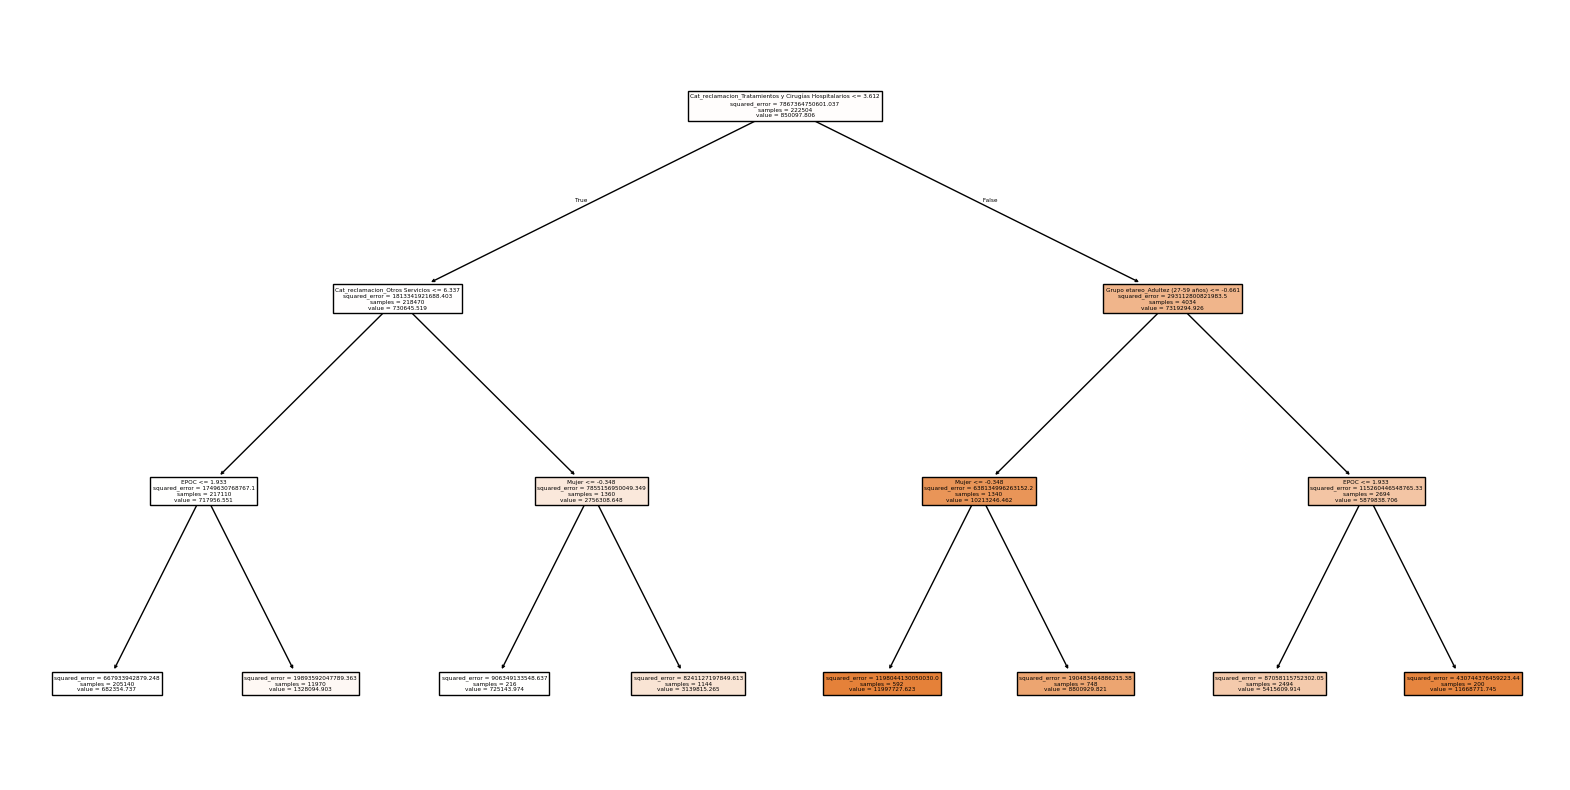

In [40]:
# Crear y entrenar el modelo de árbol de decisión para regresión
rtree = DecisionTreeRegressor(max_depth=3)
rtree.fit(X=X, y=y)

# Generar una representación de texto del árbol de decisión
tree_text = export_text(rtree, feature_names=X.columns.tolist())
print(tree_text)

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rtree, feature_names=X.columns.tolist(), filled=True)
plt.show()

El árbol de decisión muestra que las características clave que se utilizan para las divisiones son Cat_reclamacion_Tratamientos y Cirugías Hospitalarios, Cat_reclamacion_Otros Servicios, EPOC, Mujer, Grupo etareo_Adultez (27-59 años)

# Modelos candidatos

In [49]:
# Define los modelos de regresión seleccionados
#m_linreg = LinearRegression()
m_tree_reg = DecisionTreeRegressor()
m_rf_reg = RandomForestRegressor()
m_gbt_reg = GradientBoostingRegressor()

# Lista de modelos de regresión seleccionados
modelos_reg = [ m_tree_reg, m_rf_reg, m_gbt_reg]

## Selección de variables

In [53]:
# Utilizamos los modelos para seleccionar las variables
var_names = funciones.sel_variables(modelos_reg, X, y, threshold="1.3*mean")

# Verificar si se están seleccionando múltiples variables
print("Número de variables seleccionadas:", len(var_names))

# Imprimir los nombres de las características seleccionadas
print("Nombres de características seleccionadas:", var_names)

# Obtener la matriz con las variables seleccionadas
X2 = X[var_names]

# Mostrar información de X2 y X
X2.info()
X.info()

Número de variables seleccionadas: 5
Nombres de características seleccionadas: ['Cancelacion' 'Cat_reclamacion_Tratamientos y Cirugías Hospitalarios'
 'DIABETES' 'EPOC' 'Grupo etareo_Adultez (27-59 años)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222504 entries, 0 to 222503
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Cancelacion                                            222504 non-null  float64
 1   Cat_reclamacion_Tratamientos y Cirugías Hospitalarios  222504 non-null  float64
 2   DIABETES                                               222504 non-null  float64
 3   EPOC                                                   222504 non-null  float64
 4   Grupo etareo_Adultez (27-59 años)                      222504 non-null  float64
dtypes: float64(5)
memory usage: 8.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

## Definir modelo ganador

In [54]:
# Calculamos el R2, para verificar el comportamiento de los modelos (3 minutos de ejecución)

def medir_modelos_r2(modelos, X, y, cv=5):
    resultados = {}
    for modelo in modelos:
        nombre_modelo = type(modelo).__name__
        scores = cross_val_score(modelo, X, y, cv=cv, scoring='r2')
        resultados[nombre_modelo] = scores.mean()
    return resultados

# Define los modelos de regresión seleccionados
m_tree_reg = DecisionTreeRegressor()
m_rf_reg = RandomForestRegressor()
m_gbt_reg = GradientBoostingRegressor()

# Lista de modelos de regresión seleccionados
modelos_reg = [m_tree_reg, m_rf_reg, m_gbt_reg]

# Calcular R2 para todos los modelos con todas las variables
r2_scores_all = medir_modelos_r2(modelos_reg, X, y, cv=5)

# Calcular R2 para todos los modelos con variables seleccionadas
r2_scores_varsel = medir_modelos_r2(modelos_reg, X2, y, cv=5)

print("R2 para todos los modelos con todas las variables:")
for modelo, r2_score in r2_scores_all.items():
    print(f"{modelo}: {r2_score}")

print("\nR2 para todos los modelos con variables seleccionadas:")
for modelo, r2_score in r2_scores_varsel.items():
    print(f"{modelo}: {r2_score}")


R2 para todos los modelos con todas las variables:
DecisionTreeRegressor: 0.06481779552465403
RandomForestRegressor: 0.08564407708901142
GradientBoostingRegressor: 0.13324907347531095

R2 para todos los modelos con variables seleccionadas:
DecisionTreeRegressor: 0.12134312688828834
RandomForestRegressor: 0.12116747365245358
GradientBoostingRegressor: 0.1237947732069643


Estos resultados indican que, al seleccionar un conjunto específico de variables, los modelos de regresión DecisionTreeRegressor, RandomForestRegressor y GradientBoostingRegressor muestran un aumento en el coeficiente de determinación R2, lo que evidencia una mejora en la capacidad de explicar la variabilidad de la variable objetivo en comparación con el uso de todas las variables disponibles.

Con todas las variables, los modelos tienen valores R2 relativamente bajos, oscilando entre aproximadamente 0.07 y 0.13. Esto indica que las variables utilizadas inicialmente no explican completamente la variabilidad de la variable objetivo. Sin embargo, al seleccionar un conjunto más específico de variables, los modelos muestran un aumento en R2, con valores que oscilan entre 0.11 y 0.12 para DecisionTreeRegressor y RandomForestRegressor, y alrededor de 0.12 para GradientBoostingRegressor.

Esto indica que al utilizar un conjunto más limitado pero más relevante de variables, los modelos pueden explicar una mayor proporción de la variabilidad en la variable objetivo, lo que sugiere una mejora en el rendimiento predictivo.


In [55]:
# Se prueba el modelo usando el MSE (22 minutos de ejecución)
def medir_modelos(modelos, X, y, cv):
    resultados = {}
    for modelo in modelos:
        nombre_modelo = type(modelo).__name__
        scores = cross_val_score(modelo, X, y, cv=cv, scoring='neg_mean_squared_error')
        mse_scores = -scores  # Convertir puntuaciones negativas a positivas
        resultados[nombre_modelo] = mse_scores.mean()
    return resultados

# Calcular MSE para todos los modelos con todas las variables
mse_scores_all = medir_modelos(modelos_reg, X, y, 30)

# Calcular MSE para todos los modelos con variables seleccionadas
mse_scores_varsel = medir_modelos(modelos_reg, X2, y, 30)

print("MSE para todos los modelos con todas las variables:")
for modelo, mse_score in mse_scores_all.items():
    print(f"{modelo}: {mse_score}")

print("\nMSE para todos los modelos con variables seleccionadas:")
for modelo, mse_score in mse_scores_varsel.items():
    print(f"{modelo}: {mse_score}")


MSE para todos los modelos con todas las variables:
DecisionTreeRegressor: 7185702804853.309
RandomForestRegressor: 7118189347832.685
GradientBoostingRegressor: 6927709078268.892

MSE para todos los modelos con variables seleccionadas:
DecisionTreeRegressor: 6987032603868.631
RandomForestRegressor: 6987838503600.948
GradientBoostingRegressor: 6975877075727.885


•  Para el DecisionTreeRegressor, se observa que el MSE disminuye ligeramente cuando se utilizan variables seleccionadas en comparación con todas las variables. Esto podría indicar que algunas variables no aportan mucha información adicional al modelo y podrían estar introduciendo ruido.

•  Para el RandomForestRegressor, el MSE es bastante similar en ambos casos, tanto con todas las variables como con las variables seleccionadas. Esto sugiere que el modelo Random Forest es robusto frente a la selección de variables y mantiene un rendimiento consistente.

•  Para el GradientBoostingRegressor, también se ve una disminución en el MSE cuando se utilizan variables seleccionadas en lugar de todas las variables. Esto podría indicar que algunas variables no son tan relevantes para el modelo y su exclusión conduce a una mejor generalización.


**Observando los resultados proporcionados, vemos que el GradientBoostingRegressor tiene el R2 más alto tanto con todas las variables como con las variables seleccionadas. Además, presenta el MSE más bajo cuando se utilizan todas las variables. Sin embargo, cuando se consideran solo las variables seleccionadas, el GradientBoostingRegressor sigue teniendo el MSE más bajo, aunque es muy similar al del RandomForestRegressor.**

#Afinamiento de hiperparámetros

In [61]:
# Definir el modelo con las mejores métricas
gb_model = GradientBoostingRegressor() #(13 minutos de ejecución)

# Definir el grid de hiperparámetros con distribuciones para la búsqueda aleatoria
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.3),  # Se usa una distribución uniforme para el learning rate
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'subsample': uniform(0.7, 0.3)  # Se usa una distribución uniforme para el subsample
}

# Configurar la búsqueda aleatoria
gb_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
                                    #Se pone solo 10 iteraciones por el tiempo computacional y el tamaño del conjunto de datos
# Realizar la búsqueda
gb_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params_gb = gb_search.best_params_
best_score_gb = gb_search.best_score_

print(f"Mejores hiperparámetros gb: {best_params_gb}")
print(f"Mejor R2 gb: {best_score_gb}")

Mejores hiperparámetros gb: {'learning_rate': 0.13958350559263474, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 269, 'subsample': 0.7139996989640846}
Mejor R2 gb: 0.11963888235458653


Con estos parámetros, se obtuvo un coeficiente de determinación (R2) de aproximadamente 0.1196, lo que sugiere que el modelo es capaz de explicar alrededor del 11.96% de la variabilidad en los datos de manera satisfactoria. Aunque el rendimiento del modelo no es excepcional, estos resultados proporcionan una base para continuar con el análisis y la evaluación del modelo.

In [62]:
# Consideramos también el afinamiento del modelo random forest, ya que la diferencia no era significativa.
# Definir el modelo
rf_model = RandomForestRegressor() #(6 minutos de ejecución)

# Definir el grid de hiperparámetros con distribuciones para la búsqueda aleatoria
param_dist = {
    'n_estimators': randint(100, 300),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'bootstrap': [True, False]
}

# Configurar la búsqueda aleatoria
rf_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='r2', n_jobs=-1, random_state=42)
                                    #Se pone solo 10 iteraciones por el tiempo computacional y el tamaño del conjunto de datos
# Realizar la búsqueda
rf_search.fit(X, y)

# Obtener los mejores hiperparámetros
best_params_rf = rf_search.best_params_
best_score_rf = rf_search.best_score_

print(f"Mejores hiperparámetros rf: {best_params_rf}")
print(f"Mejor R2 rf: {best_score_rf}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

Mejores hiperparámetros rf: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 188}
Mejor R2 rf: 0.12447755444827568


El proceso de afinamiento del modelo Random Forest reveló algunos problemas durante la búsqueda. Se produjeron fallos en tres de las treinta combinaciones de hiperparámetros probadas. Estos fallos se debieron a un error en el parámetro max_features, donde se esperaba un valor específico, pero se proporcionó 'auto' en su lugar.

A pesar de estos problemas, el proceso de búsqueda logró encontrar los siguientes mejores hiperparámetros para el modelo Random Forest:

Se utilizó el bootstraping (con bootstrap establecido en False), una profundidad máxima de 10 (max_depth), se seleccionaron características al azar (max_features establecido en 'sqrt'), un mínimo de muestras por hoja de 2 (min_samples_leaf), un mínimo de muestras para dividir un nodo de 6 (min_samples_split) y 188 estimadores (n_estimators). Con estos hiperparámetros, el modelo alcanzó un coeficiente de determinación (R2) de aproximadamente 0.1264, lo que sugiere que es capaz de explicar alrededor del 12.64% de la variabilidad en los datos de manera satisfactoria.

#Evaluación y selección del modelo

In [67]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los modelos con los mejores hiperparámetros obtenidos
best_gb_model = GradientBoostingRegressor(**best_params_gb)
best_rf_model = RandomForestRegressor(**best_params_rf)

# Entrenar los modelos con los datos de entrenamiento
best_gb_model.fit(X_train, y_train)
best_rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_gb = best_gb_model.predict(X_test)
y_pred_rf = best_rf_model.predict(X_test)

# Calcular el R2 en el conjunto de prueba
r2_gb = r2_score(y_test, y_pred_gb)
r2_rf = r2_score(y_test, y_pred_rf)

# Comparar los puntajes R2 para determinar el mejor modelo
if r2_gb > r2_rf:
    best_model = best_gb_model
    best_model_name = 'Gradient Boosting'
    best_r2 = r2_gb
else:
    best_model = best_rf_model
    best_model_name = 'Random Forest'
    best_r2 = r2_rf

# Mostrar resultados
print(f"Resultados de la evaluación y selección del modelo:")
print(f"Mejor modelo: {best_model_name}")
print(f"R2 en conjunto de prueba: {best_r2}")

Resultados de la evaluación y selección del modelo:
Mejor modelo: Random Forest
R2 en conjunto de prueba: 0.15555356685248545


#Despliegue del modelo

In [68]:
# Guardar el modelo seleccionado (Random Forest en este caso)
joblib.dump(best_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [100]:
# Cargar el modelo entrenado
model = joblib.load('random_forest_model.pkl')

In [101]:
# Imprimir los nombres de las características
print("Características utilizadas por el modelo:")
print(df_final2.columns.tolist())

Características utilizadas por el modelo:
['Valor_Pagado', 'Mujer', 'Ciudad', 'CANCER', 'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR', 'Cancelacion', 'Grupo etareo', 'Cat_reclamacion']


In [107]:
# Definir las características utilizadas por el modelo
features = ['Mujer', 'Ciudad', 'CANCER', 'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR', 'Grupo etareo', 'Cat_reclamacion']

# Definir los widgets de entrada para las características
mujer = widgets.Checkbox(description='Mujer', value=False)
ciudad = widgets.Dropdown(description='Ciudad', options=['Barranquilla', 'Medellin', 'Bogota'], value='Medellin')
cancer = widgets.Checkbox(description='CANCER', value=False)
epoc = widgets.Checkbox(description='EPOC', value=False)
diabetes = widgets.Checkbox(description='DIABETES', value=False)
hipertension = widgets.Checkbox(description='HIPERTENSION', value=False)
enf_cardiovascular = widgets.Checkbox(description='ENF_CARDIOVASCULAR', value=False)
grupo_etareo = widgets.Dropdown(description='Grupo etareo', options=['Infancia (0-6 años)', 'Adolescencia (7-17 años)', 'Adultez (18-26 años)', 'Adultez (27-59 años)', 'Vejez (60+ años)'], value='Adultez (27-59 años)')
cat_reclamacion = widgets.Dropdown(description='Cat_reclamacion', options=['Atención Ambulatoria y Consultas', 'Otros Servicios', 'Tratamientos y Cirugías Hospitalarios'], value='Otros Servicios')

# Definir el botón de predicción
predict_button = widgets.Button(description='Realizar Predicción')

# Definir la función de predicción
def predict(mujer, ciudad, cancer, epoc, diabetes, hipertension, enf_cardiovascular, grupo_etareo, cat_reclamacion):
    # Crear un diccionario con las características ingresadas
    input_data = {
        'Mujer': mujer,
        'Ciudad': ciudad,
        'CANCER': cancer,
        'EPOC': epoc,
        'DIABETES': diabetes,
        'HIPERTENSION': hipertension,
        'ENF_CARDIOVASCULAR': enf_cardiovascular,
        'Grupo etareo': grupo_etareo,
        'Cat_reclamacion': cat_reclamacion
    }

    # Preparar los datos de entrada en el formato esperado por el modelo
    input_features = [input_data[feature] for feature in features]

    # Realizar la predicción
    prediction = model.predict([input_features])[0]

    # Mostrar el resultado de la predicción
    print(f'Valor estimado del seguro: {prediction}')

# Asociar la función de predicción al evento clic del botón
predict_button.on_click(lambda b: predict(mujer.value, ciudad.value, cancer.value, epoc.value, diabetes.value, hipertension.value, enf_cardiovascular.value, grupo_etareo.value, cat_reclamacion.value))

# Mostrar los widgets y el botón
display(mujer, ciudad, cancer, epoc, diabetes, hipertension, enf_cardiovascular, grupo_etareo, cat_reclamacion, predict_button)

Checkbox(value=False, description='Mujer')

Dropdown(description='Ciudad', index=1, options=('Barranquilla', 'Medellin', 'Bogota'), value='Medellin')

Checkbox(value=False, description='CANCER')

Checkbox(value=False, description='EPOC')

Checkbox(value=False, description='DIABETES')

Checkbox(value=False, description='HIPERTENSION')

Checkbox(value=False, description='ENF_CARDIOVASCULAR')

Dropdown(description='Grupo etareo', index=3, options=('Infancia (0-6 años)', 'Adolescencia (7-17 años)', 'Adu…

Dropdown(description='Cat_reclamacion', index=1, options=('Atención Ambulatoria y Consultas', 'Otros Servicios…

Button(description='Realizar Predicción', style=ButtonStyle())